# Ornstein Uhlenbeck calibration by MCMC

The goal is to estimate the parameters of an Ornstein Uhlenbeck model. To do this we will:
+ Implement the Likelihood Function of the OU model : $L(\alpha, \beta, \gamma, x_{t_1}, x_{t_2}, ..., x_{t_n})$
+ Extract data from the simulations implemented in OU_sumulation.ipynb: $x_{t_1}, x_{t_2}, ..., x_{t_n}$
+ Estimate the parameters of the simulation Using an MCMC optimization algorithm

### Likelihood Function

The Ornstein Uhlenbeck process is a Markov Chain. For a sample path $x_0, x_{\frac{T}{N}}, x_{\frac{2T}{N}}, ..., x_T$, the likelihood function is then equal to:

$$L(\alpha, \beta, \gamma, x_0, x_{\frac{T}{N}}, x_{\frac{2T}{N}}, ..., x_T) = \prod_{k=0}^{N-1}{f(x_{\frac{(k+1)T}{N}} | x_{\frac{kT}{N}})}$$
where $f$ is the conditional probability density function of the process.

Given $X_{\frac{kT}{N}}$, the value of the Ornstein Uhlenbeck process at time $\frac{kT}{N}$, $X_{\frac{(k+1)T}{N}}$ is normally distributed with:

$$E(X_{\frac{(k+1)T}{N}} | X_{\frac{kT}{N}}) = X_{\frac{kT}{N}}e^{-\alpha T/N} + \gamma(1-e^{-\alpha T/N})$$

$$ Var(X_{\frac{(k+1)T}{N}} | X_{\frac{kT}{N}}) = \frac{\beta^2}{2\alpha}(1-e^{-2\alpha T/N}) $$

Let's denote $E_k$ the previous expectation and $V$ the previous variance (doesn't depend on k). The likelihood function over a sample path $x_0, x_{\frac{T}{N}}, x_{\frac{2T}{N}}, ..., x_T$ of the Ornstein Uhlenbeck process is then equal to:

$$\prod_{k=0}^{N-1}{\frac{1}{\sqrt{2\pi V}} e^{-\frac{(x_{(k+1)T/N} - E_k)^2}{2V}}}$$

Consequently, the negative log likelihood is equal to:

$$NLL(\alpha, \beta, \gamma) = \sum_{k=0}^{N-1}{\frac{(x_{(k+1)T/N} - E_k)^2}{2V} + ln(2\pi V)/2 }$$

which we will minimize to find the parameters $\alpha$, $\beta$ and $\gamma$.

In [1]:
from utils import *

import matplotlib.pyplot as plt
from numpy import exp, log, pi
import numpy as np

def likelihood(T, N, alpha, beta, gamma, path):
    h = T/N
    exp_alpha_h = exp(-alpha*h)
    if type(alpha) is int and alpha == 0:
        V = h*beta**2
    else:
        V = (beta**2)*(1-exp_alpha_h**2)/(2*alpha)
    
    ans = N*log(2*pi*V)/2
    for k in range(N):
        Ek = path[k]*exp_alpha_h + gamma*(1-exp_alpha_h)
        ans += ((path[k+1] - Ek)**2)/(2*V)
    return ans


### Estimating $\alpha$
+ $x_0$ should be far from $\gamma$

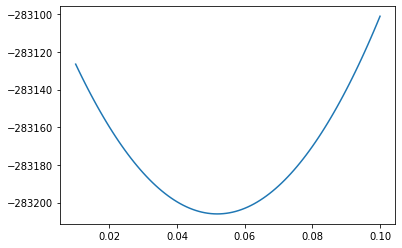

In [3]:
T = 50
N = 100000
x0 = 100
alpha = 0.05
beta = 1
gamma = 3

path = OU_process(T, N, x0, alpha, beta, gamma)
alphas = np.linspace(0.01, 0.1, 100)


NLL = likelihood(T, N, alphas, beta, gamma, path)

plt.plot(alphas, NLL)

### Estimating $\beta$
+ $T$ should be small (to focus on the first steps of the process)
+ $\beta > 0$ 

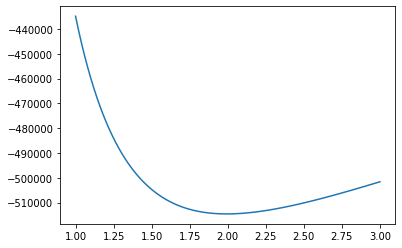

In [2]:
T = 0.05
N = 100000
x0 = 100
alpha = 0.05
beta = 2
gamma = 0

path = OU_process(T, N, x0, alpha, beta, gamma)
betas = np.linspace(beta-1, beta + 1,100)

NLL = likelihood(T, N, alpha, betas, gamma, path)

plt.plot(betas, NLL)

### Estimating $\gamma$
+ $T$ should be large enough, to allow the process to converge to $\gamma$

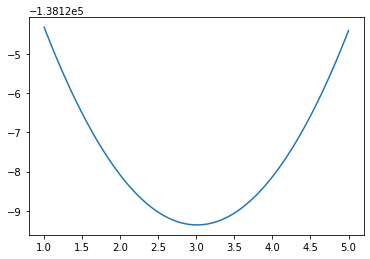

In [4]:
T = 1000
N = 100000
x0 = 0
alpha = 0.05
beta = 1
gamma = 3

path = OU_process(T, N, x0, alpha, beta, gamma)
gammas = np.linspace(gamma-2, gamma+2, 100)

NLL = likelihood(T, N, alpha, beta, gammas, path)

plt.plot(gammas, NLL)